In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.decomposition import PCA
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'AIS_2017_01_Zone01.csv'  # Use your dataset file path
data = pd.read_csv(file_path)

In [4]:
data.head(10)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,366940480,2017-01-04T11:39:36,52.48730,-174.02316,10.0,-140.7,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
1,366940480,2017-01-04T11:40:45,52.48718,-174.02835,10.0,-141.6,266.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
2,366940480,2017-01-04T11:42:26,52.48705,-174.03608,10.0,-142.3,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
3,366940480,2017-01-04T13:51:07,52.41575,-174.60041,9.1,-154.0,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
4,366940480,2017-01-04T13:55:17,52.41311,-174.61718,9.1,-157.3,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
5,366940480,2017-01-04T14:06:37,52.40527,-174.66192,9.0,-154.0,252.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
6,366940480,2017-01-04T14:19:57,52.39625,-174.71461,9.1,-159.0,249.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
7,366940480,2017-01-04T14:24:36,52.39278,-174.73318,9.1,-157.0,250.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
8,366940480,2017-01-04T14:29:17,52.38917,-174.75174,9.3,-157.9,252.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0
9,366940480,2017-01-04T14:54:26,52.36916,-174.85096,9.2,-157.1,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the numeric features for clustering
numeric_cols = ['SOG', 'COG', 'Heading', 'LAT', 'LON', 'Length', 'Width', 'Draft']

# Extract the feature columns
X = data[numeric_cols]

# Handle missing values (if any)
X = X.fillna(X.mean())

# Standardize the data (DBSCAN works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model and predict anomalies (-1 for noise, cluster labels for normal points)
data['AnomalyLabel'] = dbscan.fit_predict(X_scaled)

# Convert the output to readable format: -1 = 'Anomalous', other labels = 'Normal'
data['AnomalyLabel'] = data['AnomalyLabel'].map(lambda x: 'Anomalous' if x == -1 else 'Normal')

# Save the modified dataset with the anomaly labels
output_file_path = 'AIS_2017_01_Zone01_labeled_dbscan.csv'
data.to_csv(output_file_path, index=False)

print(f"Modified dataset with anomaly labels saved to {output_file_path}.")


Modified dataset with anomaly labels saved to AIS_2017_01_Zone01_labeled_dbscan.csv.


In [6]:
data.head(10000)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,AnomalyLabel
0,366940480,2017-01-04T11:39:36,52.48730,-174.02316,10.0,-140.7,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0,Normal
1,366940480,2017-01-04T11:40:45,52.48718,-174.02835,10.0,-141.6,266.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0,Normal
2,366940480,2017-01-04T11:42:26,52.48705,-174.03608,10.0,-142.3,267.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0,Normal
3,366940480,2017-01-04T13:51:07,52.41575,-174.60041,9.1,-154.0,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0,Normal
4,366940480,2017-01-04T13:55:17,52.41311,-174.61718,9.1,-157.3,251.0,EARLY DAWN,IMO7821130,WDB7319,1001.0,undefined,32.95,8.82,4.0,31.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,477348200,2017-01-16T16:09:32,53.08166,-176.95405,10.8,74.0,74.0,KANDA LOGGER,IMO9701035,VRPN7,1004.0,under way using engine,179.90,NaN,NaN,NaN,Normal
9996,353003000,2017-01-31T20:32:30,52.44865,-174.67185,10.5,-148.6,260.0,SPRING BRAVE,IMO9406506,3ENV4,1004.0,under way using engine,299.99,50.00,18.1,79.0,Normal
9997,366988820,2017-01-31T21:59:24,51.89581,-177.64281,10.0,-165.1,242.0,ALEUTIAN NO 1,IMO7932381,WDI9317,1001.0,engaged in fishing,37.22,9.73,NaN,30.0,Normal
9998,353003000,2017-01-31T20:33:31,52.44820,-174.67660,10.6,-148.6,261.0,SPRING BRAVE,IMO9406506,3ENV4,1004.0,under way using engine,299.99,50.00,18.1,79.0,Normal


In [7]:
# View only anomalous entries (AnomalyLabel == 1)
anomalous_data = data[data['AnomalyLabel'] == 'Anomalous']
print("Anomalous Data:")
print(anomalous_data.head(10))

Anomalous Data:
           MMSI         BaseDateTime       LAT        LON   SOG    COG  \
253   370024000  2017-01-03T05:41:52  54.72279 -176.02681  10.2 -141.3   
450   273898000  2017-01-06T13:31:41  63.98107 -174.90872  12.2  103.1   
940   273898000  2017-01-09T14:53:52  63.20720 -174.41122   4.5  -84.9   
993   273898000  2017-01-09T14:52:12  63.20545 -174.40822   5.0  -90.0   
2217  366940480  2017-01-21T02:54:05  52.55089 -174.05909  10.2   79.1   
2260  366940480  2017-01-21T03:06:32  52.56034 -174.00296  10.1   74.3   
2473  366940480  2017-01-21T03:01:54  52.55694 -174.02389  10.6   76.6   
2724  366940480  2017-01-28T01:39:52  51.85954 -176.63639   2.9   77.2   
2918  366940480  2017-01-28T01:37:46  51.86037 -176.63722   1.1  -77.9   
2919  366940480  2017-01-28T01:38:49  51.85993 -176.63686   2.9  162.1   

      Heading    VesselName         IMO CallSign  VesselType  \
253     264.0   SANTA VISTA  IMO9527946    3EYL6      1004.0   
450     106.0  MYS CHUPROVA  IMO9053335  

In [8]:
# View only non-anomalous entries (AnomalyLabel == 0)
non_anomalous_data = data[data['AnomalyLabel'] == 'Normal']
print("\nNon-Anomalous Data:")
print(non_anomalous_data.head(10))  # Display first 10 non-anomalous entries


Non-Anomalous Data:
        MMSI         BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  366940480  2017-01-04T11:39:36  52.48730 -174.02316  10.0 -140.7    267.0   
1  366940480  2017-01-04T11:40:45  52.48718 -174.02835  10.0 -141.6    266.0   
2  366940480  2017-01-04T11:42:26  52.48705 -174.03608  10.0 -142.3    267.0   
3  366940480  2017-01-04T13:51:07  52.41575 -174.60041   9.1 -154.0    251.0   
4  366940480  2017-01-04T13:55:17  52.41311 -174.61718   9.1 -157.3    251.0   
5  366940480  2017-01-04T14:06:37  52.40527 -174.66192   9.0 -154.0    252.0   
6  366940480  2017-01-04T14:19:57  52.39625 -174.71461   9.1 -159.0    249.0   
7  366940480  2017-01-04T14:24:36  52.39278 -174.73318   9.1 -157.0    250.0   
8  366940480  2017-01-04T14:29:17  52.38917 -174.75174   9.3 -157.9    252.0   
9  366940480  2017-01-04T14:54:26  52.36916 -174.85096   9.2 -157.1    251.0   

   VesselName         IMO CallSign  VesselType     Status  Length  Width  \
0  EARLY DAWN  IMO7821

In [9]:
# Fill missing values in categorical columns with placeholders
data['VesselName'].fillna('Unknown', inplace=True)
data['IMO'].fillna('Unknown', inplace=True)
data['CallSign'].fillna('Unknown', inplace=True)
data['Status'].fillna('Unknown', inplace=True)

In [10]:
# Impute missing values in numerical columns with median
imputer = SimpleImputer(strategy='median')
numerical_columns = ['Length', 'Width', 'Draft', 'Cargo']
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [11]:
# Feature Engineering: Create new features for speed and course changes
data['Speed_Delta'] = data['SOG'].diff().fillna(0)
data['Course_Delta'] = data['COG'].diff().fillna(0)

In [12]:
# Drop rows with any remaining missing values as a precaution
data.dropna(inplace=True)

In [13]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['VesselName', 'IMO', 'CallSign', 'BaseDateTime'])

In [14]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = ['LAT', 'LON', 'SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft', 'Cargo', 'Speed_Delta', 'Course_Delta']
data_cleaned[scaled_features] = scaler.fit_transform(data_cleaned[scaled_features])


In [15]:
# PCA for Feature Reduction
pca = PCA(n_components=5)  # Reduce to 5 principal components
data_pca = pca.fit_transform(data_cleaned[scaled_features])

In [16]:
# Convert PCA result back into a DataFrame
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(5)])

In [17]:
# SVR Model for Speed_Delta Prediction
X_svr = data_pca  # Features after PCA
y_svr = data_cleaned['Speed_Delta']  # Target for SVR (Speed_Delta)

In [18]:
#Splitting the data into training and test sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)


SVR Mean Squared Error: 0.029972490029527097
SVR R^2 Score: 0.9695973348881659
Binary Classification Accuracy: 0.9876968503937008

Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                1822                   2
True Positive                  23                 185

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99      1824
    Positive       0.99      0.89      0.94       208

    accuracy                           0.99      2032
   macro avg       0.99      0.94      0.96      2032
weighted avg       0.99      0.99      0.99      2032



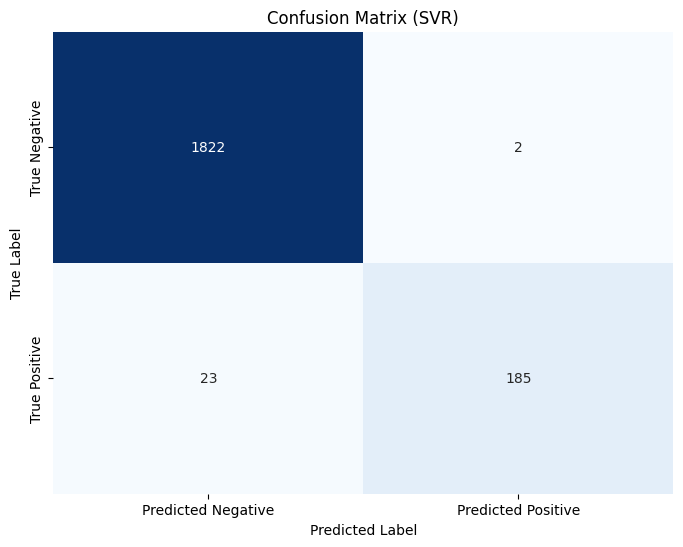

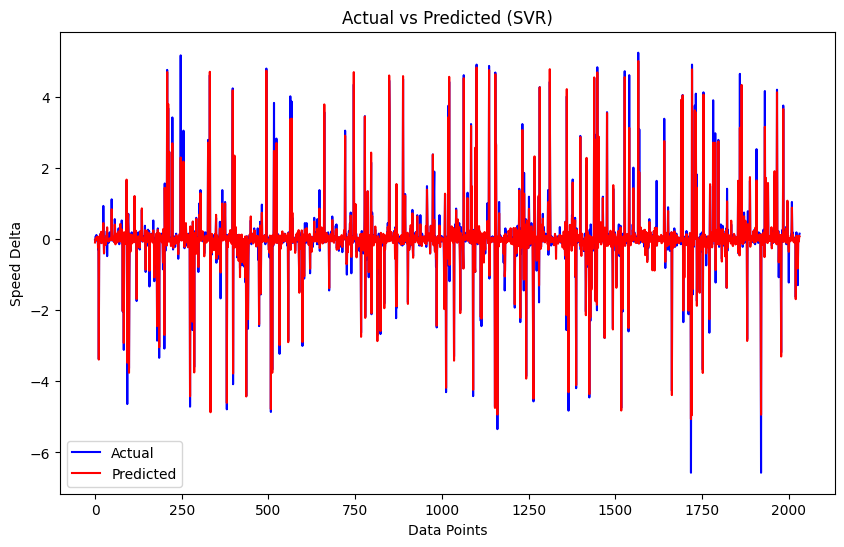

Anomalies detected:
9820   -1.161928
9386    2.869316
3960    1.349896
3184    1.262957
9601    1.358398
9267    1.480071
9394    1.204226
9391    1.317382
9005    1.047303
9380   -1.507460
3910    1.189186
9270    1.514583
9625    1.608072
9329   -1.629816
9264    1.004549
Name: Speed_Delta, dtype: float64
Anomalous ships:
           MMSI       LAT        LON  Speed_Delta                  Status
9820  273898000  63.19793 -174.41008        -12.5  under way using engine
9386  316022036  49.21853 -179.11166         13.9  under way using engine
3960  370633000  53.26260 -177.12988         10.3  under way using engine
3184  538006238  22.17992 -176.90392          3.4  under way using engine
9601  311056400  53.08564 -177.01571          5.1  under way using engine
9267  477099600  21.96967 -175.46533         12.4  under way using engine
9394  311056400  53.10865 -176.88081          8.3  under way using engine
9391  311056400  53.10613 -176.89555          4.4  under way using engine
9005  36

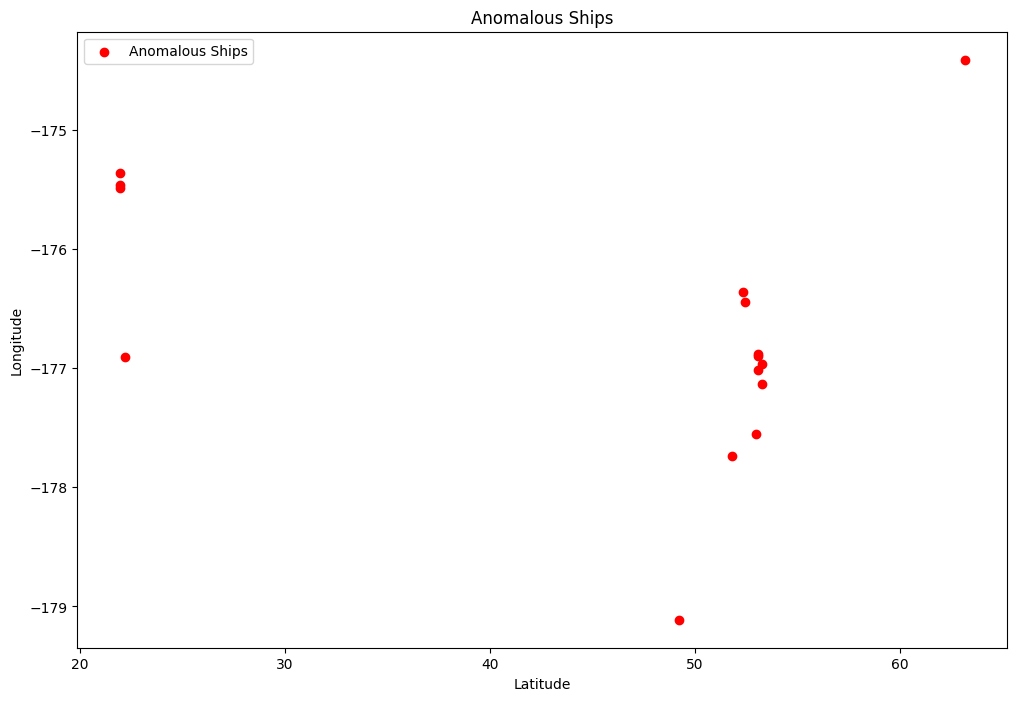

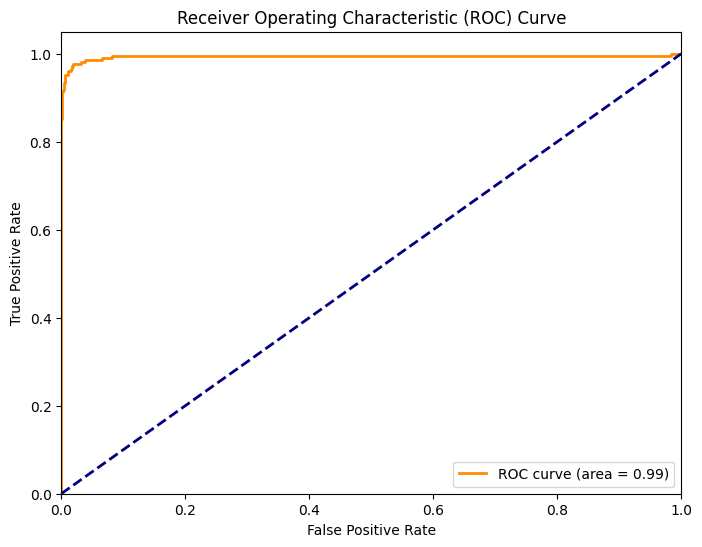

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Initialize SVR model
svr_model = SVR()

# Train the SVR model
svr_model.fit(X_train_svr, y_train_svr)

# Predict on the test set
svr_predictions = svr_model.predict(X_test_svr)

# Evaluate the SVR model
mse = mean_squared_error(y_test_svr, svr_predictions)
r2 = r2_score(y_test_svr, svr_predictions)

print(f'\nSVR Mean Squared Error: {mse}')
print(f'SVR R^2 Score: {r2}')

# Convert to Binary Classification
# Define threshold for anomaly detection
threshold = 1

# Create binary labels for anomalies
y_test_binary = (np.abs(y_test_svr) > threshold).astype(int)
svr_predictions_binary = (np.abs(svr_predictions) > threshold).astype(int)

# Compute Accuracy
accuracy = accuracy_score(y_test_binary, svr_predictions_binary)
print(f'Binary Classification Accuracy: {accuracy}')

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, svr_predictions_binary)

# Print Confusion Matrix in tabular format
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Print Classification Report
class_report = classification_report(y_test_binary, svr_predictions_binary, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('Confusion Matrix (SVR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Plotting Actual vs Predicted for SVR Model**
plt.figure(figsize=(10, 6))
plt.plot(y_test_svr.values, label='Actual', color='blue')
plt.plot(svr_predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted (SVR)')
plt.xlabel('Data Points')
plt.ylabel('Speed Delta')
plt.legend()
plt.show()

# **Anomalies Detection with SVR**
# Calculate residuals
residuals = y_test_svr - svr_predictions

# Identify anomalies
anomalies = residuals[np.abs(residuals) > threshold]

# Print anomalies
print("Anomalies detected:")
print(anomalies)

# Map anomalies back to original dataframe
anomalous_indices = X_test_svr.index[np.abs(residuals) > threshold]

# Ensure indices are in original DataFrame
data_with_anomalies = data.iloc[anomalous_indices][['MMSI', 'LAT', 'LON', 'Speed_Delta', 'Status']]

print("Anomalous ships:")
print(data_with_anomalies)

# **Plotting Anomalous Ships**
plt.figure(figsize=(12, 8))
plt.scatter(data_with_anomalies['LAT'], data_with_anomalies['LON'], c='red', label='Anomalous Ships')
plt.title('Anomalous Ships')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# **Plotting ROC and AUC Curves**
# Since SVR outputs continuous values, use them directly for ROC/AUC calculation
fpr, tpr, _ = roc_curve(y_test_binary, np.abs(svr_predictions))  # Using absolute values of SVR predictions for ROC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Save SVR model and preprocessing objects
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


Logistic Regression Accuracy: 0.8986220472440944

Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                1820                   4
True Positive                 202                   6

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95      1824
    Positive       0.60      0.03      0.06       208

    accuracy                           0.90      2032
   macro avg       0.75      0.51      0.50      2032
weighted avg       0.87      0.90      0.86      2032



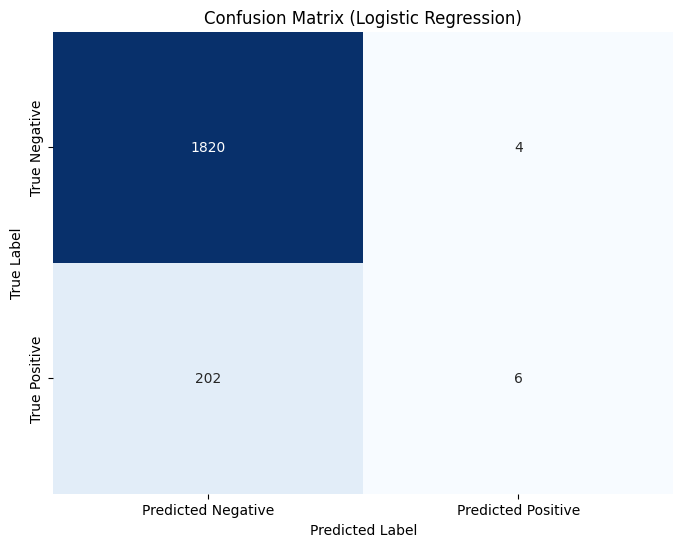

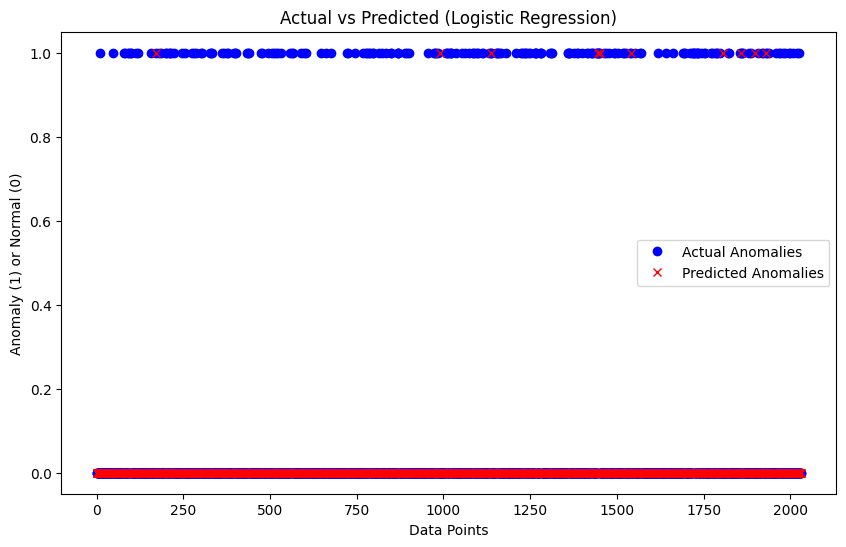

Anomalous ships detected by Logistic Regression:
           MMSI       LAT        LON  Speed_Delta                  Status
9696  353003000  52.33862 -175.42960         -3.2  under way using engine
9797  354001000  21.52533 -175.04275          0.2  under way using engine
9728  353003000  52.33002 -175.49808         -3.0  under way using engine
9225  477099600  21.96167 -175.43883          7.9  under way using engine
9649  353003000  52.34568 -175.36727         -0.4  under way using engine
9267  477099600  21.96967 -175.46533         12.4  under way using engine
9964  353003000  52.35470 -175.27375         -1.5  under way using engine
9270  477099600  21.94283 -175.36350         12.5  under way using engine
9300  477135600  50.71070 -176.29814          0.3  under way using engine
9264  477099600  21.97533 -175.48533         11.2  under way using engine


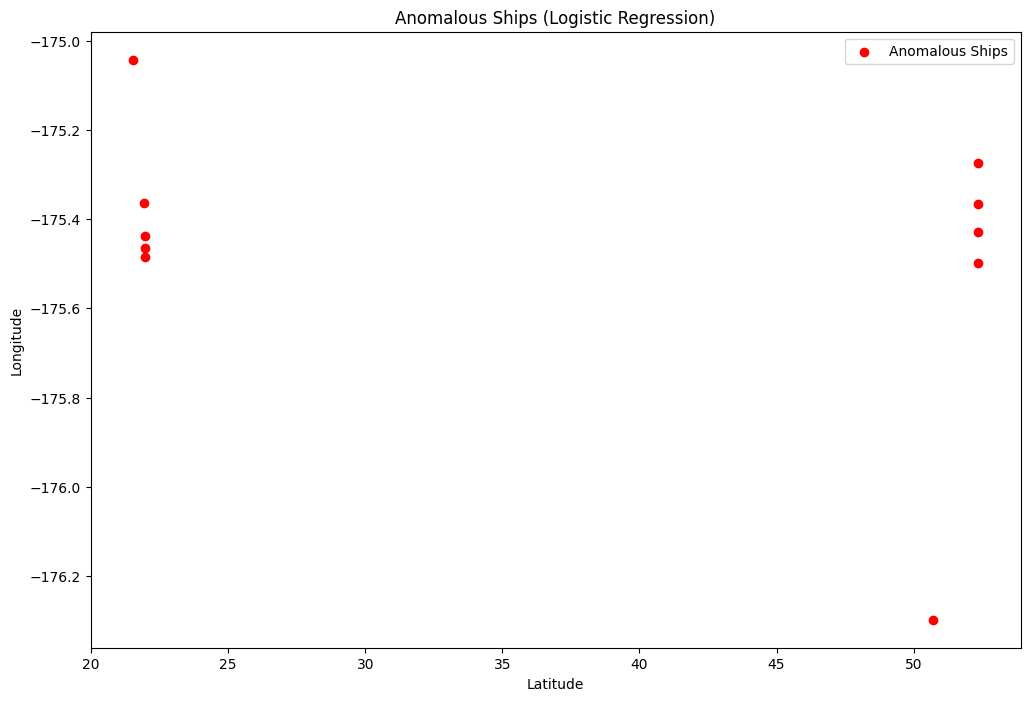

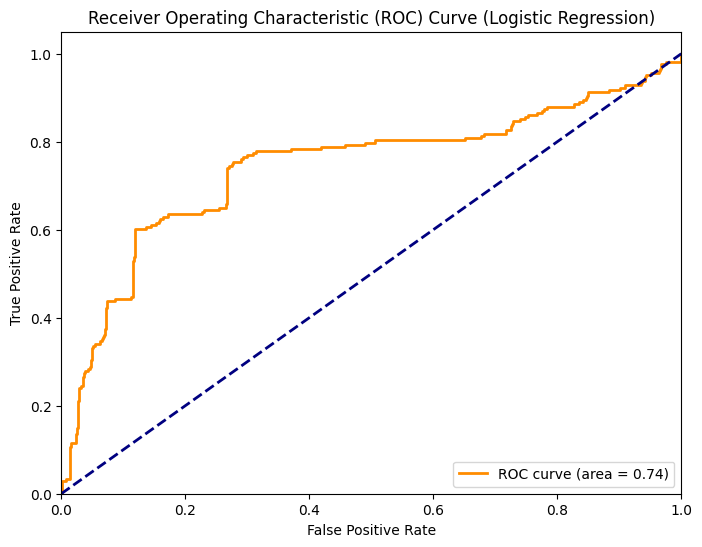

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Logistic Regression Model for Anomaly Detection**
X_logreg = data_pca  # Features after PCA
y_logreg = data_cleaned['Speed_Delta']  # Target (Speed_Delta)

# Convert Speed_Delta to binary labels for anomaly detection (threshold method)
threshold = 1.0
y_logreg_binary = (np.abs(y_logreg) > threshold).astype(int)

# Splitting the data into training and test sets
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg_binary, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train_logreg, y_train_logreg)

# Predict on the test set
logreg_predictions = logreg_model.predict(X_test_logreg)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test_logreg, logreg_predictions)
print(f'Logistic Regression Accuracy: {accuracy}')

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test_logreg, logreg_predictions)

# Print Confusion Matrix in tabular format
conf_matrix_data = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\nConfusion Matrix:")
print(conf_matrix_data)

# Print Classification Report
class_report = classification_report(y_test_logreg, logreg_predictions, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Plotting Actual vs Predicted for Logistic Regression Model**
plt.figure(figsize=(10, 6))
plt.plot(y_test_logreg.values, label='Actual Anomalies', color='blue', marker='o', linestyle='None')
plt.plot(logreg_predictions, label='Predicted Anomalies', color='red', marker='x', linestyle='None')
plt.title('Actual vs Predicted (Logistic Regression)')
plt.xlabel('Data Points')
plt.ylabel('Anomaly (1) or Normal (0)')
plt.legend()
plt.show()


# **Anomalies Detection with Logistic Regression**
# Identifying the anomalies
anomalous_indices = X_test_logreg.index[logreg_predictions == 1]

# Ensure indices are in original DataFrame
data_with_anomalies = data.iloc[anomalous_indices][['MMSI', 'LAT', 'LON', 'Speed_Delta', 'Status']]

print("Anomalous ships detected by Logistic Regression:")
print(data_with_anomalies)

# **Plotting Anomalous Ships**
plt.figure(figsize=(12, 8))
plt.scatter(data_with_anomalies['LAT'], data_with_anomalies['LON'], c='red', label='Anomalous Ships')
plt.title('Anomalous Ships (Logistic Regression)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

# **Plotting ROC and AUC Curves for Logistic Regression**
# Obtain predicted probabilities for ROC calculation
y_test_probs = logreg_model.predict_proba(X_test_logreg)[:, 1]  # Get probabilities for the positive class

fpr, tpr, _ = roc_curve(y_test_logreg, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Save Logistic Regression model and preprocessing objects
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)
